In [2]:
# import libreries
import sudoku
from os.path import exists
from time import time
from matplotlib import pyplot as plt

# set matplotlib params
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def main(input_image, width=500, height=None, color=(0.,0.75,0.), filename=None,
         dataset_dir='./dataset/digits-dataset', model_dir='./model/', summaries_dir=None, 
         retrain=False ):
    
  """
  input_image   --> Path to input image;
  width         --> Resize input image fixing the width. If None, no resize will be applied;
  height        --> Resize input image fixing the width. If None, no resize will be applied.
                    If both, heigt and width, are not None, the image will be resized based
                    on the width;
  color         --> RGB values to plot answer from the solved sudoku. Default color is Green;
  filename      --> Path to save the solved sudoku image;
  dataset_dir   --> Path to dataset (to train the digit recognizer);
  model_dir     --> Path to the trained model (.ckpt files);
  summaries_dir --> Where to save summary logs for TensorBoard;
  retrain       --> (Re)Train the digit recognizer;
  """
    
  if retrain:
    print('Digit recognizer will be train ...')
    print('  Model dir: {}'.format(model_dir))
    print('  Dataset dir: {}'.format(dataset_dir))
    print('  Summary dir: {}'.format(summaries_dir))

    if not exists(dataset_dir):
      print('Dataset not found! Model couldn\'t be trained!')
      return

    # Retrain model
    sudoku.train_model(learning_rate=1e-3, steps=300, logdir=summaries_dir, save_model=model_dir, dataset_dir=dataset_dir)
    
  if not exists(model_dir):
    print('Model not found!')
    return

  time_init = time()
  # creat Sudoku object
  sdk = sudoku.Sudoku()
  # load input image and resize it
  sdk.load_sudoku(input_image, width, height)
  # solve sudoku
  sdk.solve(model_dir=model_dir)
  # show output
  sdk.show(color=color, filename=filename)

  # show the elased time --:Read image - preprocess - recognise digits - solve puzzle:--
  time_end = time()
  print('Time elapsed: {}s'.format(time_end - time_init))

Digit recognizer will be train ...
  Model dir: ./model/
  Dataset dir: ./dataset/digits-dataset
  Summary dir: ./summary/
train accuracy on step 0: 0.2199999988079071
train accuracy on step 100: 1.0
train accuracy on step 200: 0.9800000190734863
test accuracy:  0.975
Model saved in path: ./model/digits_model.ckpt
INFO:tensorflow:Restoring parameters from ./model/digits_model.ckpt
Model restored.


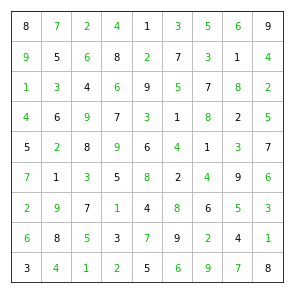

Time elapsed: 0.815199613571167s
INFO:tensorflow:Restoring parameters from ./model/digits_model.ckpt
Model restored.


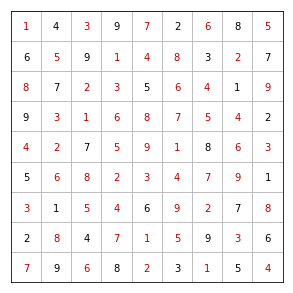

Time elapsed: 0.8094425201416016s


In [4]:
if __name__ == '__main__':
  main(input_image='./docs/sudoku2.jpg', summaries_dir='./summary/', retrain=True)
  main(input_image='./docs/sudoku3.jpg', color=(.75,0,0))